 ## Assignment 4- Predicting Delivery Time using linear regression model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 4/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Rename the column

In [3]:
df1=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Text(0, 0.5, 'Delivery Time')

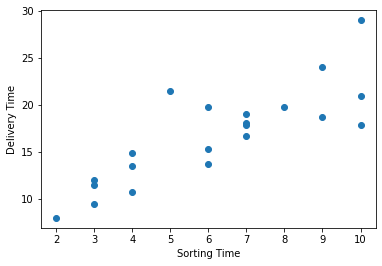

In [25]:
x=df1['Sorting_Time']
y=df1['Delivery_Time']
plt.scatter(x,y)

plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
# data is having positive corelation between deliveri ans sort time

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

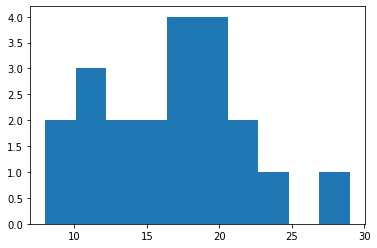

In [36]:
plt.hist(df1['Delivery_Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

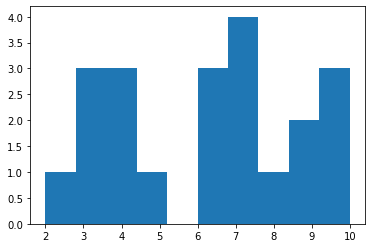

In [37]:
plt.hist(df1['Sorting_Time'])

## Finding corelation 

In [6]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

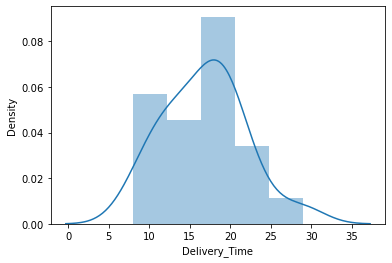

In [7]:
sns.distplot(df1["Delivery_Time"])


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

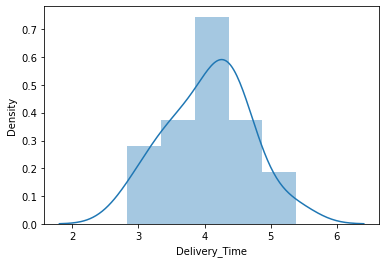

In [8]:
#sqrt tranformation
sns.distplot(np.sqrt(df1["Delivery_Time"]))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

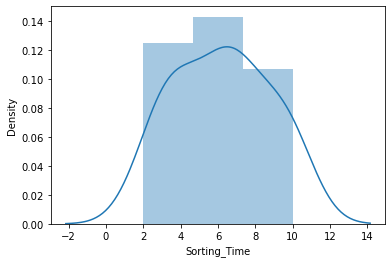

In [9]:
sns.distplot(df1["Sorting_Time"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

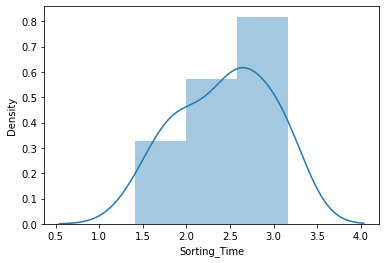

In [10]:
sns.distplot(np.sqrt(df1["Sorting_Time"]))

## Fitting the linear regression model.
### data without transformation


In [11]:
import statsmodels.formula.api as smf
model1=smf.ols("Delivery_Time~Sorting_Time",data=df1).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

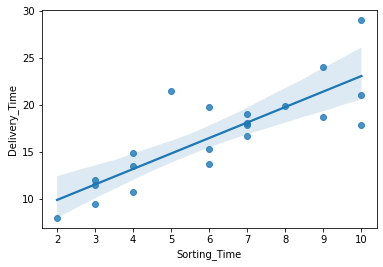

In [12]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=df1)

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        20:55:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 # Model 2: Log tranformation of dataset
 

In [14]:
df_log=np.log(df1)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

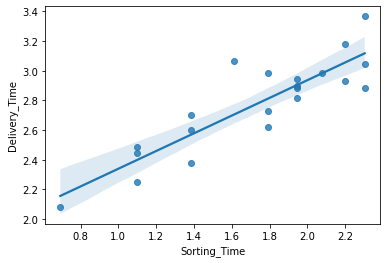

In [15]:
model2=smf.ols("Delivery_Time~Sorting_Time",data=df_log).fit()
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=df_log)

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                        20:55:48   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
Sorting_Time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3:sqr root tranformation of dataset}

In [17]:
df_sqrt=np.sqrt(df1)

In [18]:
model3=smf.ols("Delivery_Time~Sorting_Time",data=df_sqrt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                        20:55:48   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Finding the coeficient values.

since model 3 has high r sq value we will use that model for Linear regression

In [19]:
model3.params

Intercept       1.613479
Sorting_Time    1.002217
dtype: float64

In [20]:
model2.params

Intercept       1.741987
Sorting_Time    0.597522
dtype: float64

In [21]:
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

## Finding t- value and P values.

In [38]:
print(model3.tvalues,'/n',model3.pvalues)

Intercept       4.628248
Sorting_Time    7.152817
dtype: float64 /n Intercept       1.833621e-04
Sorting_Time    8.475706e-07
dtype: float64


In [39]:
print(model2.tvalues,'/n',model2.pvalues)

Intercept       13.085552
Sorting_Time     8.024484
dtype: float64 /n Intercept       5.921137e-11
Sorting_Time    1.601539e-07
dtype: float64


In [41]:
print(model1.tvalues,'/n',model1.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 /n Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


## Finding R square and adj R square values.¶

In [66]:
print(model3.rsquared,model3.rsquared_adj)

0.7292011987544664 0.7149486302678594


## manually calculation

In [60]:
#Y = mX + C 
#Deliveri_time=1.002217*(sorting values)+  1.613479
Deliveri_time=1.002217*5+  1.613479
Deliveri_time

6.6245639999999995

# Predicting over data set
## model1

In [63]:
predicted_DT1=model1.predict(df1['Sorting_Time'])
predicted_DT1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [64]:
predicted_DT=pd.DataFrame(predicted_DT1,columns=['predicted_DT'])
predicted_DT

,predicted_DT
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933
5,16.476853
6,18.125873
7,11.529794
8,23.072933
9,21.423913


In [79]:
final_df=pd.concat([df1,predicted_DT],axis=1)
final_df

,Delivery_Time,Sorting_Time,predicted_DT
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


# Predicting over data set
## model3

In [73]:
predicted_DT2=model3.predict(df_sqrt['Sorting_Time'])
predicted_DT2

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

In [74]:
predicted_DT2=pd.DataFrame(predicted_DT2,columns=['predicted_DT'])
predicted_DT2


,predicted_DT
0,4.782767
1,3.617912
2,4.068399
3,4.620129
4,4.782767
5,4.068399
6,4.265095
7,3.349369
8,4.782767
9,4.620129


In [78]:
predicted_DT3=predicted_DT2*predicted_DT2 #( as we transformed data fisrt)
final_df2=pd.concat([df1,predicted_DT3],axis=1)
final_df2

,Delivery_Time,Sorting_Time,predicted_DT
0,21.00,10,22.874858
1,13.50,4,13.089290
2,19.75,6,16.551868
3,24.00,9,21.345595
4,29.00,10,22.874858
5,15.35,6,16.551868
6,19.00,7,18.191038
7,9.50,3,11.218274
8,17.90,10,22.874858
9,18.75,9,21.345595


<AxesSubplot:xlabel='Sorting_Time'>

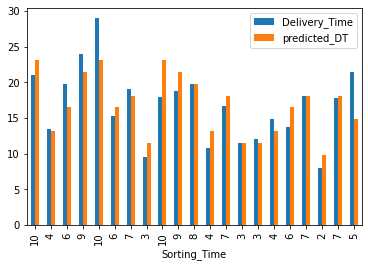

In [81]:
#comparing actual vs predicted values  with model 1
final_df.plot(x='Sorting_Time',y=['Delivery_Time','predicted_DT'],kind='bar')

<AxesSubplot:xlabel='Sorting_Time'>

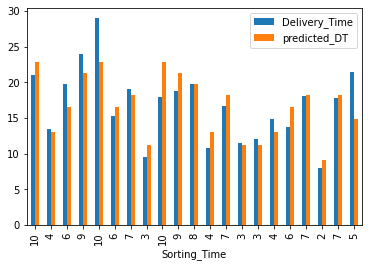

In [82]:
#comparing actual vs predicted values  with model 1

final_df2.plot(x='Sorting_Time',y=['Delivery_Time','predicted_DT'],kind='bar')

# we select model 3  as it has high R sqared and adj R squared values
